In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

file = open('gamma0.pickle', 'rb')
solutions = pickle.load(file)
file.close()

In [11]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)

def A(k,l):
  return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod

def f(t,pos):
  x_mod,y_mod = modulo_grid(*pos)
  t = 30
  dx = -np.real(np.sum(1j*K*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dy = np.real(np.sum(1j*L*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  return [dx,dy]

[0.012540228951887025, 0.010965206850400628, 0.012187217487066576, 0.014365449831877316, 0.01872036091943937, 0.01879217076675058, 0.01504759910485901, 0.019604271614531026, 0.014220729787770205, 0.018812496901653864, 0.012980775343694587, 0.014867102490528254, 0.015410342073700421, 0.01399161507910486, 0.004304548226727349, 0.004371602552053778, 0.010819590695575877, 0.004543538899523437, 0.0016606036383702784, 0.0018825845363934478, 0.005956589505381367, 0.0023193675966814388, 0.015402136149457502, 0.005898562942405565, 0.008033314114102564, 0.008780548757632808, 0.0062587276749433585, 0.012373400701241904, 0.006941793110856332, 0.001189546967104198, 0.009163204387476068, 0.01723010713081037, 0.004648839671068786, 0.010538942195406877, 0.006260275658657512, 0.011066263798803103, 0.00719402631202422, 0.00626201840660988, 0.00970607547502734, 0.0019046286692501184, 0.005914057818854917, 0.008082114637290487, 0.003919761147021661, 0.010584401844821562, 0.00689107542176723, 0.00853644985

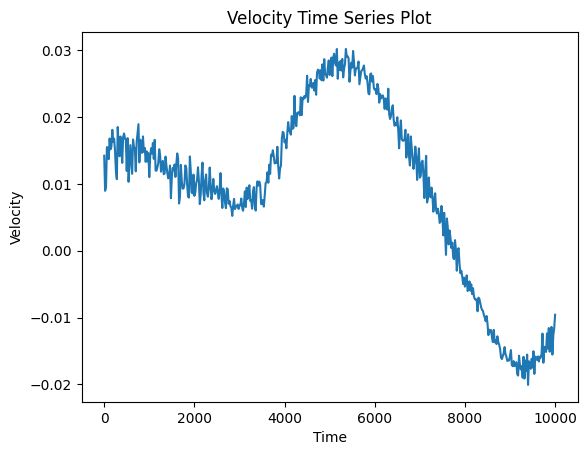

In [31]:
#all velocities in one list
initial_time = 0
time_steps_list =  range(0,10001, 20)
x_vel_list=[]
y_vel_list=[]

for time in time_steps_list:
    x_vel_sum = 0
    y_vel_sum = 0
    for sol in solutions:


        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        new_x = x[time] #finds new indices
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        x_vel_sum += x_vel
        y_vel = vel[1]
        y_vel_sum += y_vel

    x_vel_list.append(x_vel_sum/500)
    y_vel_list.append(y_vel_sum/500)
        
print(x_vel_list)
print(y_vel_list)

fig, ax = plt.subplots()
ax.plot(time_steps_list, y_vel_list)
plt.xlabel('Time (half a day)')
plt.ylabel('Velocity (300km/day)')
plt.title('Velocity Time Series Plot')
plt.show()

0.021035717368162295
-0.018165360850759645
-0.01419146520241729
0.002068481120810679
0.0073273812311038826
0.007663673163220091
0.0038189531454933057
0.001679724279134884
0.006136566808089908
0.0025091263264015416
0.003440320193186124
0.0063878210807743205
0.005712552276098756
0.002747952601278595
0.005553428094591802
0.0015957200709103326
0.0034226020308585695
0.0021146702947299322
0.002244216045384088
0.0026721452140106745
0.0032807847440966837
0.0033484273581694205
0.0007782158123210845
0.0016433270972908392
0.0019928873879956777
0.0006110777852143047
0.001594881865949403
0.000992354699945403
-2.8481002261500463e-05
-0.0004440947672842554
-0.0009670586363922403
-0.00010233459915305426
0.0004245837396591658
-0.0013396622088349716
-0.0006337837139964737
-0.001001958795516067
-6.211333678072979e-05
-0.0008895974249565642
-0.00103184588093869
-0.0010195380180910503
-0.0009753044507176537
-0.0008397652426283393
-0.0006333237088078106
-0.0006603924631183715
-0.0009857035838176493
-0.00173

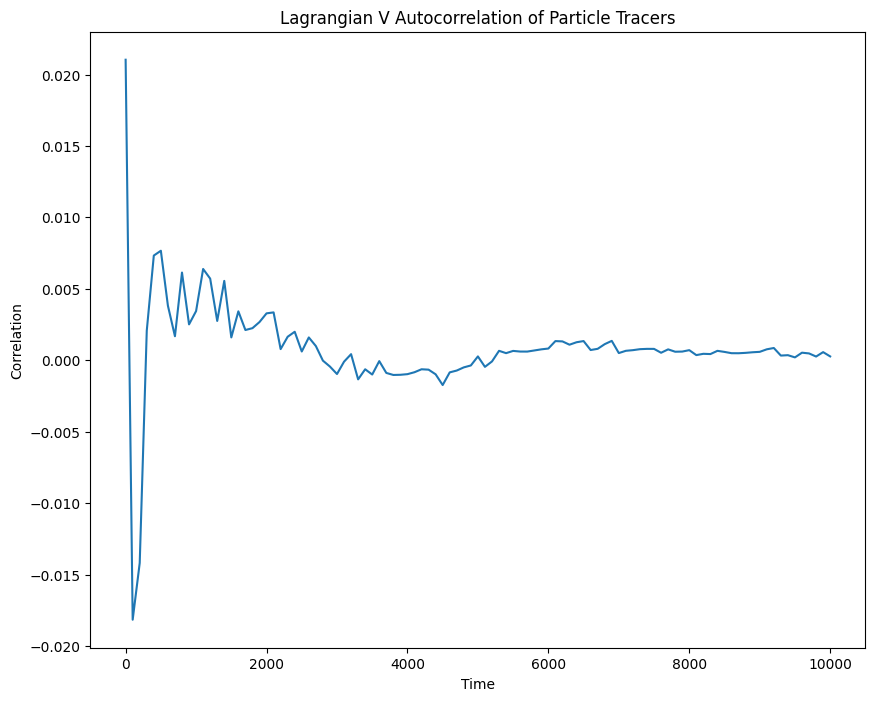

In [21]:
#sus version

vaf_list=[] #empty velocity autocorrelations list
n = 10001
time_steps_list= range(0,10001, 100)

x_sq = 0
y_sq = 0

for time in time_steps_list:
    
    dot_prod = 0 #initialise dot product for each different time
    
    for sol in solutions:

        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        initial_time = 0
        initial_x = x[0]
        initial_y = y[0]
        initial_x_vel = f(initial_time, [initial_x, initial_y])[0]
        initial_y_vel = f(initial_time, [initial_x, initial_y])[1]
        
        new_x = x[time]
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        y_vel = vel[1]
        
        x_sq += x_vel**2
        y_sq += y_vel**2
        speed_sq = x_sq + y_sq

        dot_prod += initial_y_vel * y_vel 
        
    vaf_list.append(dot_prod/speed_sq) 

for vaf in vaf_list:
    print(vaf)

fig, ax = plt.subplots()
ax.plot(time_steps_list, vaf_list)
fig.set_size_inches(10, 8)
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Lagrangian V Autocorrelation of Particle Tracers')
plt.show()




[1.0, 0.9863098523678856, 0.9807195775805262, 0.9799705372547814, 0.9764298997035211, 0.9714733383576446, 0.9668020311671882, 0.9625888949678304, 0.95883640052039, 0.9533288685202411, 0.9472553591747378, 0.9430817919737289, 0.938232256308036, 0.9320890958567954, 0.9264498025985436, 0.9193883105740364, 0.9123996939894218, 0.906575562204611, 0.8984871590596016, 0.8915516567086207, 0.88382485203431, 0.8750732009821702, 0.8678040004365629, 0.8597854032925022, 0.8508000419376485, 0.8424717871338677, 0.8349103484121857, 0.8263343956381617, 0.8171465575492038, 0.8068433820008986, 0.7975595889634903, 0.7873597840999488, 0.7784427752792483, 0.7688527616160973, 0.7576738013069171, 0.7470368047004742, 0.7368659907228793, 0.72636764006537, 0.7150331661725493, 0.7046965373944207, 0.6940459200826515, 0.6827797247628544, 0.6707946432640495, 0.6596211129159982, 0.6494931020386915, 0.6364509564982022, 0.6242176847478393, 0.6134205617626398, 0.602470208094553, 0.5905458659258541, 0.5775186722667266, 0.5

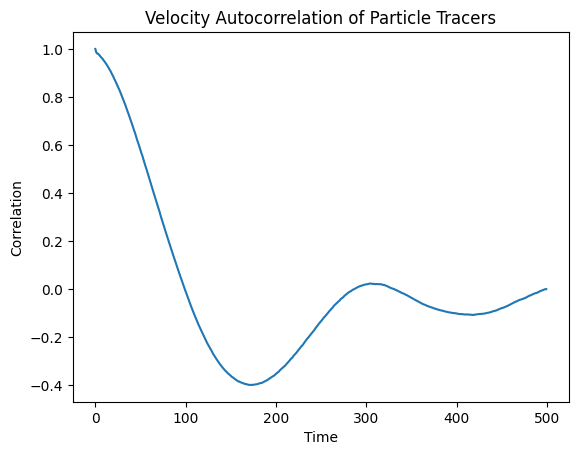

In [33]:
#more correct method of autocorrelation

y_series_mean = np.mean(y_vel_list)
n = 500
steps_list= range(0, 500)
acf_lag_list=[]

#working out s0
s0 = 0
k = 0
for i in range(1, n+1):
    s0 += (1/n)*(y_vel_list[i] - y_series_mean)*(y_vel_list[i+k] - y_series_mean)

for k in steps_list:
    acf_lag = 0
    for i in range(1, n-k+1):

        acf_lag += (1/n)*(y_vel_list[i] - y_series_mean)*(y_vel_list[i+k] - y_series_mean)

    acf_lag_list.append(acf_lag/s0)
    
print(acf_lag_list)
plt.plot(steps_list, acf_lag_list)
plt.xlabel('Time (10 days)')
plt.ylabel('Correlation')
plt.title('Velocity Autocorrelation of Particle Tracers')
plt.show()